# **Explorando las danzas celestiales : Una aproximación detallada a las órbitas planterias en el Sistema Solar**


---


*Elaborado por: Valeria Alexandra Valencia Colorado*

*Facultad Ciencias Exactas y Naturales*

*Instituto de Física*

*Universidad de Antioquia*

# Código parte 2


---

Necesita volver a usar el dataframe


In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as plt
from scipy.spatial import geometric_slerp
from mpl_toolkits.mplot3d import Axes3D

In [2]:
datos= {
    "Planeta" : ["Mercurio","Venus","Tierra","Marte","Jupiter","Saturno","Urano","Neptuno"],
    "Semieje_Mayor" : [0.387, 0.723, 1.000, 1.527, 5.203, 9.539, 19.191, 30.061],
    "Excentricidad" : [0.206, 0.007, 0.017, 0.093, 0.048, 0.056, 0.046, 0.010],
    "y0" : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    "vx0" : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}

In [3]:
#Crear un data frame
df=pd.DataFrame(datos)

In [4]:
#Añadir una columna llamada x0,redondeada a 3 cifras decimales
df["x0"]=round(df["Semieje_Mayor"]-df["Excentricidad"]*df["Semieje_Mayor"],3)

In [5]:
#Constantes
G=6.67E-11 #Constante gravitacional
M=1.989E30 #Masa del sol en Kg
r1=round((df["Semieje_Mayor"]-df["Excentricidad"]*df["Semieje_Mayor"])*1.496E11,3)
r2=round((df["Semieje_Mayor"]+df["Excentricidad"]*df["Semieje_Mayor"])*1.496E11,3)

#Añadir columna llamada vy0,redondeada a 3 cifras decimales
df["vy0"]=round(np.sqrt((2*G*M*r2)/(r1*(r1+r2))),3)
df["vy0"]=round((df["vy0"]*3.15E7/1.496E11),3)
df

,Planeta,Semieje_Mayor,Excentricidad,y0,vx0,x0,vy0
0,Mercurio,0.387,0.206,0.0,0.0,0.307,12.422
1,Venus,0.723,0.007,0.0,0.0,0.718,7.426
2,Tierra,1.000,0.017,0.0,0.0,0.983,6.378
3,Marte,1.527,0.093,0.0,0.0,1.385,5.570
4,Jupiter,5.203,0.048,0.0,0.0,4.953,2.884
5,Saturno,9.539,0.056,0.0,0.0,9.005,2.147
6,Urano,19.191,0.046,0.0,0.0,18.308,1.499
7,Neptuno,30.061,0.010,0.0,0.0,29.760,1.155


# **Librería Odeint**

La decisión de emplear la librería Odeint de scipy para resolver el problema de las órbitas planetarias se fundamente en su eficacia y conveniencia. Odeint simplifica la implementación del código al ofrecer una interfaz accesible y fácil de usar, liberandonos de la complejidad asociada con la implementación manual de algoritmos numéricos. Además, esta librería aprovecha métodos de integración de alto orden y adaptativos, lo que significa que ajusta automáticamente el tamaño del paso de tiempo para garantizar soluciones precisas y eficientes, haciendo que sea una herramienta sólida y efectiva para resolver el problema en cuestión

In [6]:
def orbita_planetaria(condI,t):
    x, vx, y, vy = condI
    dxdt = vx
    dydt = vy
    dvxdt=-4 * np.pi**2 * x/((x**2+y**2)**(3/2))
    dvydt=-4 * np.pi**2 * y/((x**2+y**2)**(3/2))
    return np.array([dxdt,dvxdt,dydt,dvydt])

In [7]:
#Definir tiempo de integración
t=np.linspace(0,1000,100000)

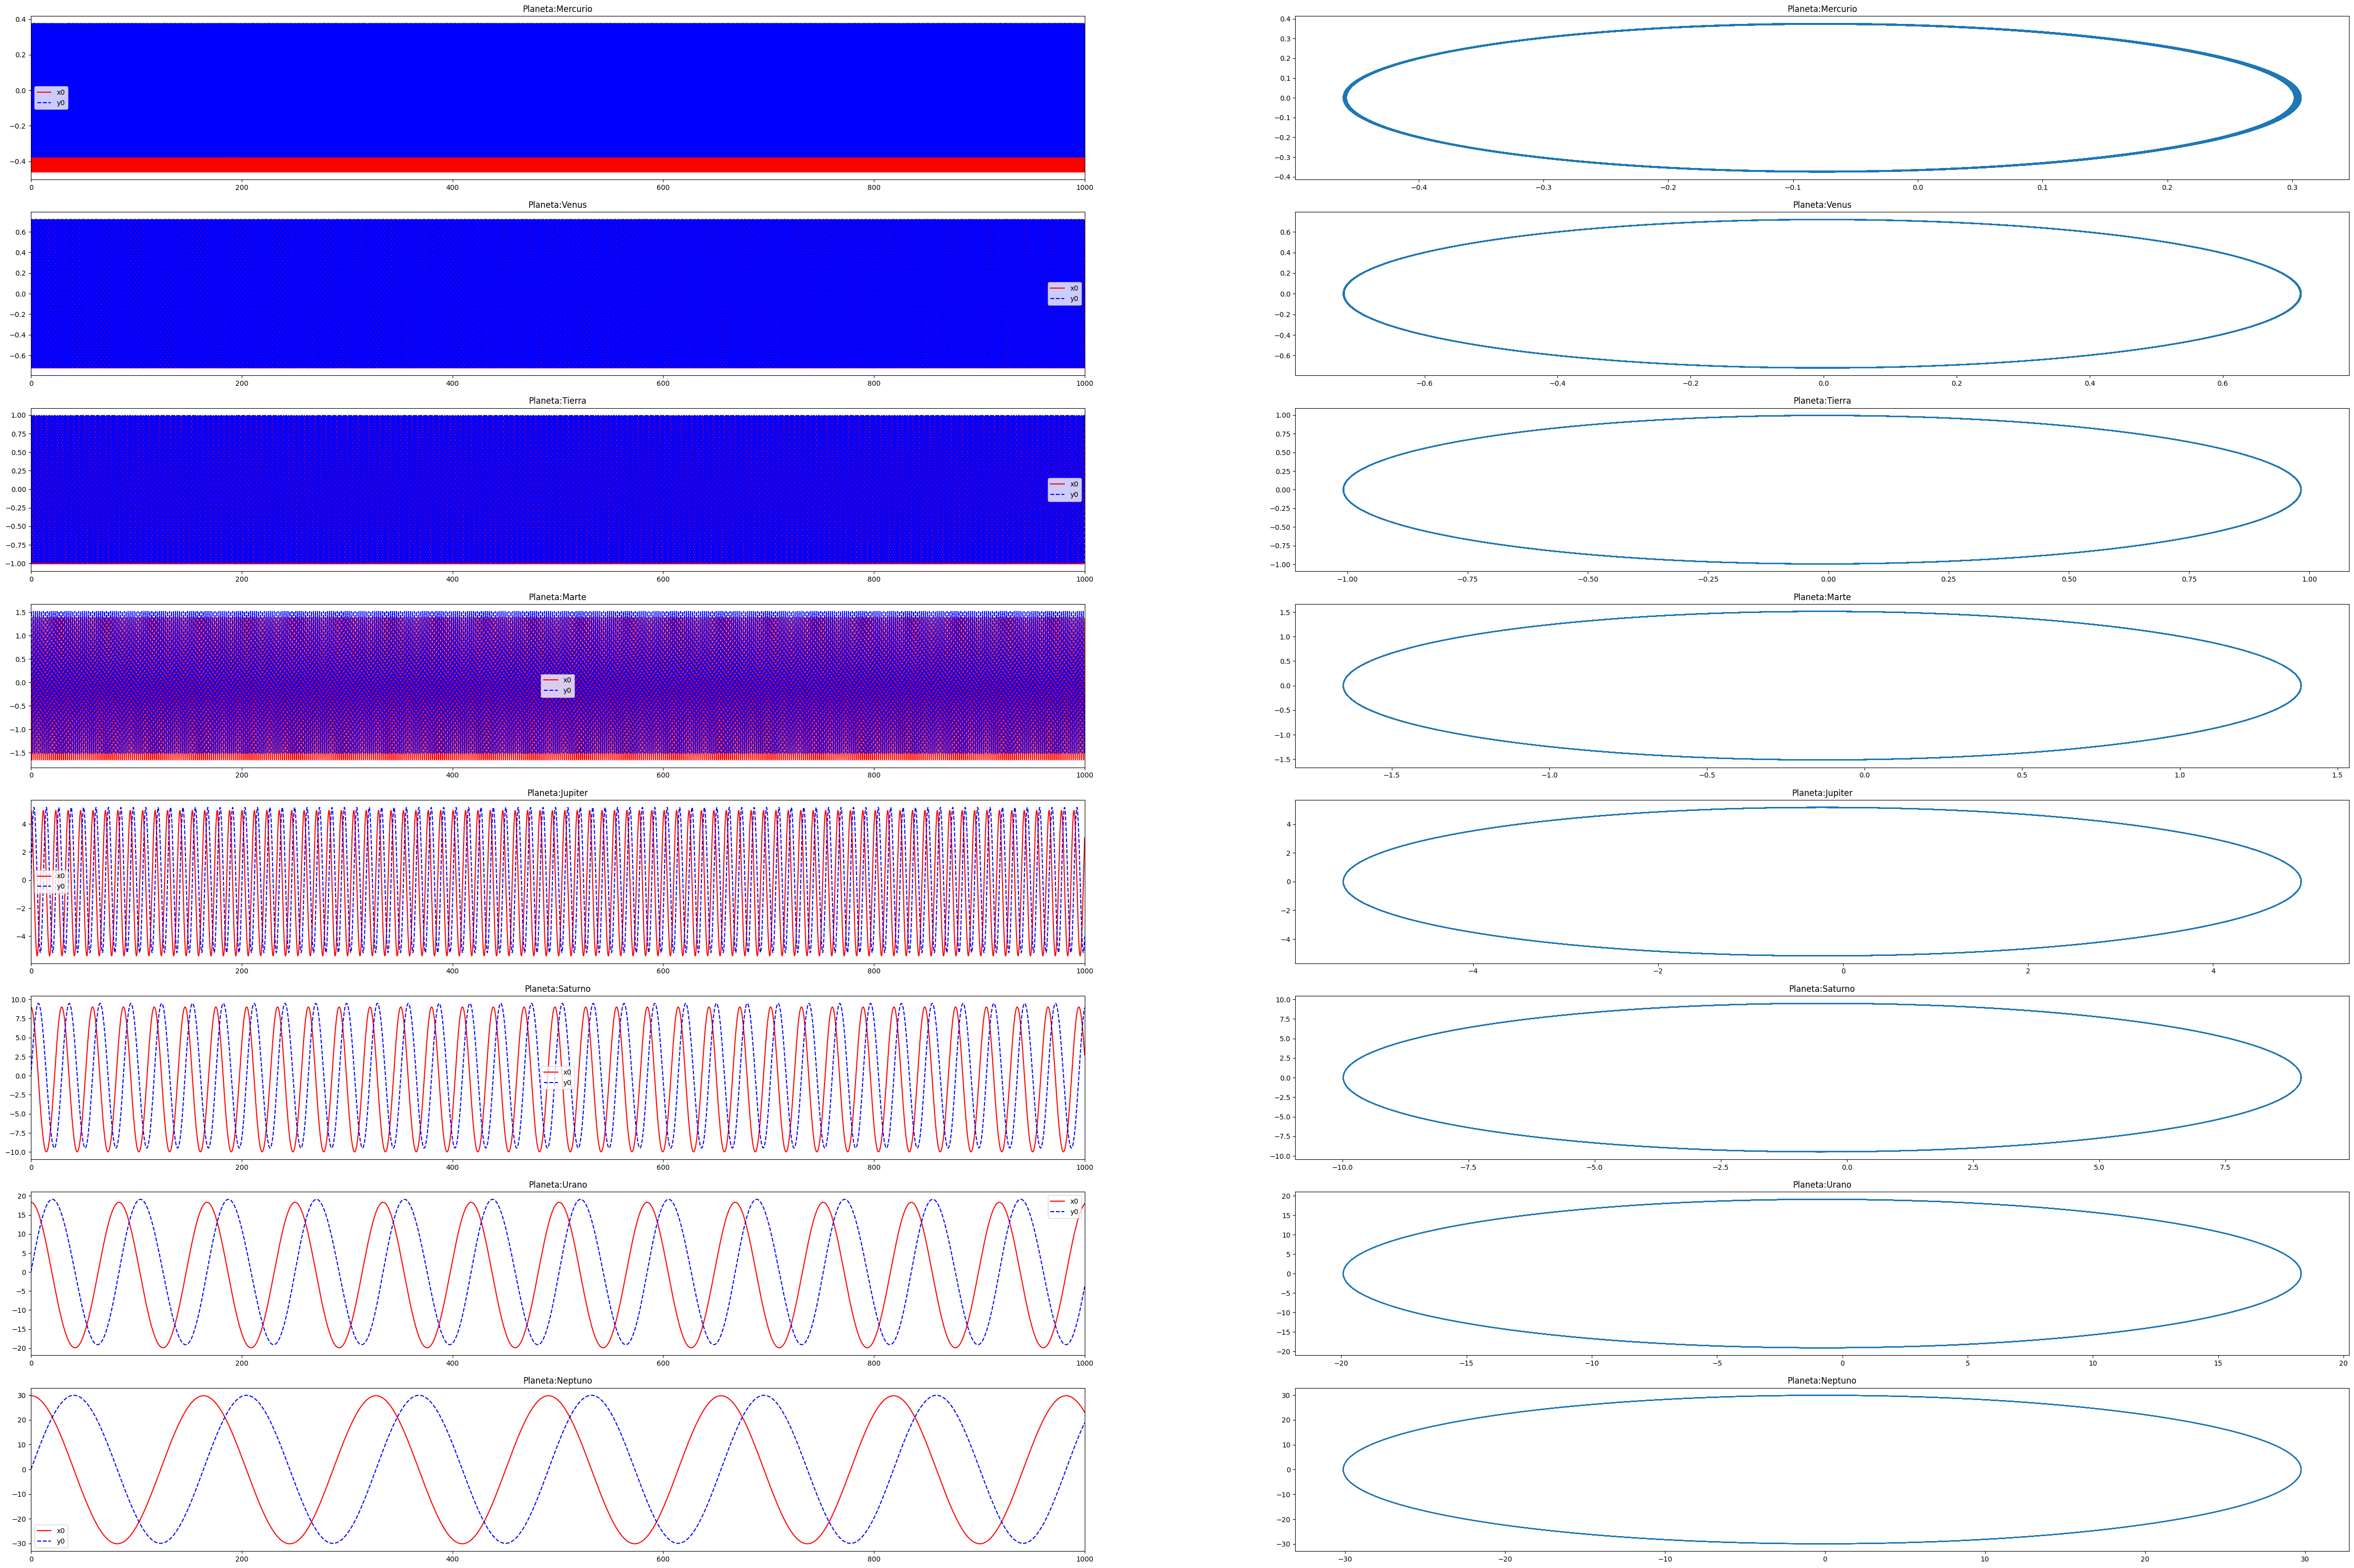

In [8]:
fig,axs=plt.subplots(8,2,figsize=(60,40))
for i in range(len(df)):
    condI= np.array([df["x0"][i],df["vx0"][i],df["y0"][i],df["vy0"][i]])
    solucion_edo=odeint(orbita_planetaria,condI,t)
    #Graficar x0,y0 vs t en la primera columna
    axs[i,0].plot(t,solucion_edo[:,0],"r",linestyle="-",label="x0")
    axs[i,0].plot(t,solucion_edo[:,2],"b",linestyle="--",label="y0")
    axs[i,0].set_xlim(min(t),max(t))
    axs[i,0].set_title(f"Planeta:{df['Planeta'][i]}")
    axs[i,0].legend()

    #Graficar x0 vs y0 en la segunda columna
    axs[i,1].plot(solucion_edo[:,0],solucion_edo[:,2])
    axs[i,1].set_title(f"Planeta:{df['Planeta'][i]}")

plt.show()

Las gráficas presentadas anteriormente se dividen en dos conjuntos de subgráficos, simétricamente dispuestos. Aquellos en el lado derecho, correspondientes a la segunda columna, ofrecen una representación visual de las órbitas elípticas de cada planeta.Estos gráficos, análogos a un sistema de coordenadas bidimensional(eje x e y), reflejan la posición relativa de los planetas mientras orbitan alrededor del sol.

Por otro lado,los subgráficos del lado izquierdo,equivalentes a la primera columna, capturan la noción de periocidad orbital. En este conjunto, cada gráfico ilustra el momento en que un planeta completa un ciclo orbital alrededor del sol. Esta representación proporciona una visión clara de los periodos orbitales individuales,destacando la regularifad con la que los planetas retornan a su posición inicial en sus respectivas órbitas. Esta disposición simétrica y organizada permite una comparación visual efectiva entre las órbitas y las periocidades, ofreciendo una comprensión completa y estructurada ade la dinámica orbital de cada planeta en el sistema solar.

### **¿Tiene sentido los resultados obtenidos por ambos métodos?**


---


La comparación entre los resultados obtenidos mediante los métodos de Odeint y Runge Kutta revela coherencia con el conocimiento astronómico actual. Las gráficas reflejan de manera precisa las órbitas elípticas de los planetas y confirman la noción de de periodicidad orbital. Un ejemplo destacado es Mercurio, que al estar má cercano al sol, presenta una aparente falta de diferencia perceptible entre susperiodos orbitales debido a su frecuencia relativamente alta de vuelta alrededor del sol.

Contrastando con Mercurio, se observa que Neptuno, siendo el último de los planetas, muestra una clara variación entre periodo y periodo, eso se alinea con la expectativa, ya que Neptuno, ubicado en una órbita mucho más extensa requiere considerablemente más tiempo para completar su vuelta alrededor del sol.

Un punto crucial a considerar es el rango de tiempo seleccionado para la representación de la gráfica. Elegir un rango de tiempo demasiad pequeño puede resultar en la pérdida de la visión completa de la elipse para planetas distantes como neptuno, mostrando solo una fracción de la curva orbital. Por lo tanto, la elección de un ranfo de tiempo adecuado es esencial para una representación completa y comprensible de las órbitas planetarias. En conjunto, estas observaciones coinciden con la realidad a pesar de la simplificación del problema, mostrando la coherencia de los resultados obtenidos con los métodos numéricos utilizados

### **Comparación de ambos métodos**


---


Durante la implementación de los métodos númericos para la simulación de órbitas planetarias, se observó una notable sensibilidad del método de Runge-Kutta al paso del tiempo elegido.Esta sensibilidad se hizo evidente al comparar los resultados obtenidos con diferentes intervalos de tiempo en el linspace utilizado para la simulación

Cuano se empleó un intervalo de tiempo más pequeño, en este caso t2=np.linspace(0,1000,1000000), las elipses de las órbitas convergieron de manera más precisa y el método mostró un comportamiento estable para la totalidad de los planetas si se reduce este intervalo de tiempo se empiezan a presentar anomalías significativas en las órbitas de Mercurio, Tierra y Marte, donde las elipses se redujeron a líneas rectas.

Este fenómeno sugiere que el método de Runge-Kutta puede volverse más suceptible a condiciones iniciales y parámetros específicos del sistema cuando se utiliza un paso de tiempo más pequeño. En cambio, la librería odeint mostró convergencia adecuada en el intervalo t=np.linspace(0,1000,100000), lo que indica una mayor robustez en condiciones similares

Es crucial destacar que la elección del paso del tiempo no es trivial y puede influir significativamente en la estabilidad y precisión de los métodos númericos utilizados.Explorar métodos de ajuste adaptativo del paso del tiempo, experimentar con diferentes condiciones iniciales y parámetros y considerar opciones específicas del método Runge-Kutta pueden ser estrategias efectivas para abordar esta sensibilidad.

# **Interpolación**

La elección de utilizar Scipy.spatial.geometric.slerp para la interpolación de las órbitas en tres dimensiones se fundamenta en la complejidad intrínseca de las órbitas planetarias, las cuales, al ser elípticas, requieren un enfoque específico para garantizar una interpolación precisa y coherente. Slerp ofrece un algoritmo diseñado para trabajar de manera óptima espacios tridimensionales. Al tratarse de órbitas planetarias que se manifiestan en un entorno 3D, es crucial abordar la interpolación en todas las dimensiones(x,y,z) para capturar con precisión las trayectorias orbitales completas. Además, la elección de representar la interpolación en la superficie de la bola unitaria asegura la coherencia con las propiedades esféricas del método, preservando la geometría esférica intrínseca de las órbitas y evitando distorsiones.

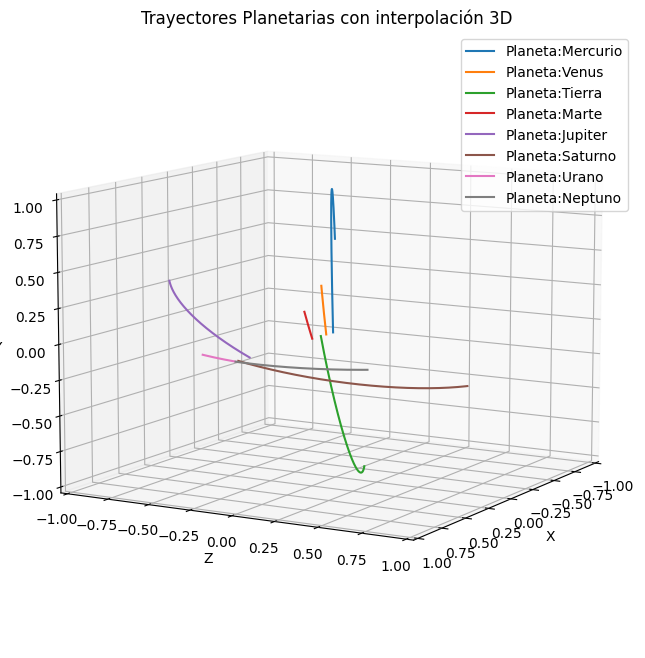

In [14]:
num_planetas = len(df)
num_tiempos = len(t)
soluciones_edo = np.zeros((num_planetas, num_tiempos, 4))
for i in range(len(df)):
    condI = np.array([df["x0"][i], df["vx0"][i], df["y0"][i], df["vy0"][i]])
    soluciones_edo[i] = odeint(orbita_planetaria, condI, t)

num_puntos_interpolar = 100000
valores_t_inter = np.linspace(0, 1, num_puntos_interpolar)

# Inicializar figura
fig_3d = plt.figure(figsize=(12, 8))
ax_3d = fig_3d.add_subplot(111, projection="3d")

for i in range(len(df)):
    inicio = soluciones_edo[i][0] / np.linalg.norm(soluciones_edo[i][0])
    fin = soluciones_edo[i][-1] / np.linalg.norm(soluciones_edo[i][-1])

    inter_puntos = geometric_slerp(inicio, fin, valores_t_inter)
    ax_3d.plot(inter_puntos[:, 0], inter_puntos[:, 2], inter_puntos[:, 1], label=f"Planeta:{df['Planeta'][i]}")

ax_3d.set_xlabel("X")
ax_3d.set_ylabel("Z")
ax_3d.set_zlabel("Y")
ax_3d.set_xlim(-1,1)
ax_3d.set_ylim(-1,1)
ax_3d.set_zlim(-1,1)
ax_3d.view_init(elev=10,azim=30)
ax_3d.set_title("Trayectores Planetarias con interpolación 3D")
ax_3d.legend()
plt.show()


La representación de las órbitas planetarias como elipses en un gráfico tridimensional se logra mediante la interpolación suave de puntos a lo largo del tiempo. Al aumentar la cantidad de puntos de interpolación se obtiene una representación detallada y suave de las trayectorias, lo que debería resultar en arcos de elipse más precisos, sin embargo esta mejora en la precisión tiene un costo computacional. A medida que aumentamos la cantidad de puntos de interpolación, la carga de la memoria RAM se incrementa considerablemente. Esto se debe a que para cada punto adiciconal en la interpolación, se almacena información adicional, lo que puede sobrepasar la capacidad de la memoria disponible. En nuestro caso, al intentar aumentar la cantidad de puntos de la interpolación se debe obtener una representación detallada de las elipses, nos enfrentamos a la limitación de la RAM de la computadora. La capacidad d ela memoria no es suficiente para manejar la gran cantidad de datos generados por la interpolación adicional, lo que resulta en una representación caótica en el gráfico.

# **Conclusiones**


---


- El análisis de la simulación de las órbitas planetarias, evidenció que el método odeint exhibió una mayor robustez y estabilidad en comparación con el método de Runge-Kutta. La sensibilidad observada en Runge-Kutta especialmente al emplear intervalos de tiempo más pequeños resultó en anomalías en las órbitas de algunos planetas.En contraste odeint demostró convergencia adecuada y coherencia en un rango más amplio de intervalos de tiempo. Esta observación sugiere que en términos de sensibilidad a la elección del paso de tiempo odeint puede ser considerado como una opción más robusta y confiable para la simulación de órbitas planetarias en este contexto específico.

- A pesar de que la simulación se llevó a cabo bajo la consideración de un sistema simplificado, sin tener en cuenta perturbaciones gravitacionales y manteniendo el sol en el centro, los resultados obtenidos proporcionan una aproximación notablemente cercana a la realidad observada en el sistema solar. La representación de las órbitas elípticas y la periodización de los planetas,aunque simplificada, muestra ser coherente con los principios astronómicos conocidos.Esta cercanía a la realidad, incluso en un modelo simplificado, destaca la eficacia de los métodos numéricos utilizados y sugiere que, bajo ciertas condiciones iniciales y simplificaciones asumidas, es posible obtener resultados que se alinean con los fenómenos astronómicos observados. Aunque se reconoce que este modelo carece de complejidades como las perturbaciones gravitacionales entre planetas, su capacidad para reflejar caracterpisticas fundamentales del sistema solar subraya la utilidad y valides de las aproximaciones numéricas en el estudio de fenómenos astronómicos

- Dada la naturaleza del código y las posibles limitaciones de la memoria RAM en Google Colab, se recomienda considerar la ejecución de este programa en un entorno de desarrollo local o en otra plataforma más estable. Los entornos locales suelen ofrecer un mejor rendimiento y mayor control sobre los recursos del sistema, evitando posible interrupciones debidas a restriccciones de memoria.Esto garantizará una experiencia de ejecución más fluida y confiable, especialmente al trabajar con conjuntos de datos extensos o realizar cálculos computacionales intensivos.

# **Referencias**

- http://www.sc.ehu.es/sbweb/fisica3/celeste/ecuacion_1/ecuacion_1.html


- https://www.windows2universe.org/our_solar_system/planets_orbits_table.html&lang=sp

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.geometric_slerp.html

- https://es.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta#:~:text=En%20an%C3%A1lisis%20num%C3%A9rico%2C%20los%20m%C3%A9todos,Kutta.